Text(0.5, 0, 'TF image number')

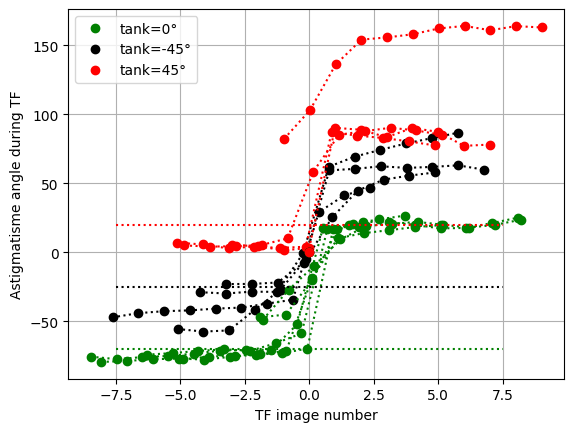

In [6]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
from labellines import labelLines
import glob
from astropy.io import fits
import warnings
import glob
import numpy as np
warnings.filterwarnings("ignore")

beg=-70
for f in glob.glob("/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/DOBC_data/230602/*eg*/**/*_cat.fits"):
    a=Table.read(f)
    if "-45" in f:
        c="k"
        factor=1
        plt.plot(np.arange(11)-a["Center"][0],a['THETA_IMAGE'],":o",c=c)#,label="tank=-45°")
    elif "45" in f:
        c="r"
        factor=-1
        plt.plot(np.arange(11)-a["Center"][0],90-a['THETA_IMAGE'],":o",c=c)#,label="tank=-45°")
    else:
        c="g"
        factor=1
        plt.plot(np.arange(11)-a["Center"][0],a['THETA_IMAGE'],":o",c=c)#,label="tank=0°")
plt.plot(0,0,"og",label="tank=0°")
plt.plot(0,0,"ok",label="tank=-45°")
plt.plot(0,0,"or",label="tank=45°")
plt.legend()
plt.grid("both")
plt.plot([-7.5,7.5],[beg,beg],":g")
plt.plot([-7.5,7.5],[beg+45,beg+45],":k")
plt.plot([-7.5,7.5],[beg+2*45,beg+2*45],":r")
plt.ylabel("Astigmatisme angle during TF")
plt.xlabel("TF image number")

In [1]:


values = ["46869516-46871910", 
"46873241-46875658", 
"46876862-46879256", 
"46880524-46882915", 
"46884323-46886716", 
"46888833-46891242", 
"46892802-46895203", 
"46896889-46899271", 
"46900618-46903015", 
"46905119-46907505", 
]
for v in values:
    throughfocus(xpapoint=None, plot_=True, argv="-p /Volumes/VINCENT/GOBC/today/stack[%s].fits"%(v))

    throughfocus(xpapoint=None, plot_=True, argv="-p /Volumes/VINCENT/GOBC/today/stack[%s].fits"%("46918461-46920829"))


NameError: name 'throughfocus' is not defined

In [7]:
list_im = glob.glob("/Users/Vincent/DS9QuickLookPlugIn/subsets/230414_13H11m24/LINAENC-LINBENC**/test.jpg")
imgs    = [ Image.open(i) for i in list_im ]
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack([i.resize(min_shape) for i in imgs])
imgs_comb = Image.fromarray( imgs_comb)
imgs_comb.save( '/Users/Vincent/DS9QuickLookPlugIn/subsets/230414_13H11m24/vertical.jpg' )


IndexError: list index out of range

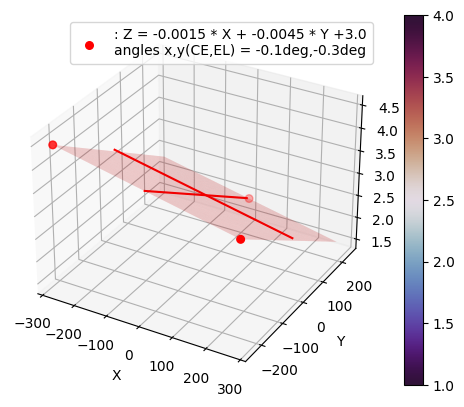

In [9]:

def fit_quadratic_curve(x, y, z, sigma_z=None, order=2, Plot=True, n=100, ax=None, c="r", title=None,legend=""):
    """Linear or quadratic fit of data
    """
    import matplotlib
    import matplotlib.cm as cmx
    from scipy import linalg

    cm = plt.get_cmap("twilight_shifted")
    cNorm = matplotlib.colors.Normalize(vmin=1, vmax=4)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

    if sigma_z is None:
        index = np.isfinite(z)
        #        data = np.array(zip(x[index],y[index],z[index]))
        data = np.array([x[index], y[index], z[index]]).T
    else:
        index = (np.isfinite(z)) & (np.isfinite(sigma_z))
        data = np.array(zip(x[index], y[index], z[index] / sigma_z[index]))
    # regular grid covering the domain of the data
    X, Y = np.meshgrid(np.linspace(x.min(), x.max(), n), np.linspace(y.min(), y.max(), n))
    # X, Y = np.meshgrid(np.linspace(0, x.max(), n), np.linspace(0, y.max(), n))
    XX = X.flatten()
    YY = Y.flatten()

    order = order  # 1: linear, 2: quadratic
    if order == 1:
        # best-fit linear plane
        if sigma_z is None:
            A = np.c_[data[:, 0], data[:, 1], np.ones(data.shape[0])]
        else:
            A = np.c_[data[:, 0], data[:, 1], np.ones(data.shape[0])] / sigma_z[:, np.newaxis]

        C, _, _, _ = linalg.lstsq(A, data[:, 2])  # coefficients
        # evaluate it on grid
        Z = C[0] * X + C[1] * Y + C[2]
        # or expressed using matrix/vector product
        # Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)
        l ="%s: Z = %0.4f * X + %0.4f * Y +%0.1f\nangles x,y(CE,EL) = %0.1fdeg,%0.1fdeg"%(legend,C[0], C[1], C[2],180*np.arctan(C[0])/np.pi,180*np.arctan(C[1])/np.pi)
    elif order == 2:
        if sigma_z is None:
            # best-fit quadratic curve
            A = np.c_[np.ones(data.shape[0]), data[:, :2], np.prod(data[:, :2], axis=1), data[:, :2] ** 2]
        else:
            # best-fit quadratic curve
            A = np.c_[np.ones(data.shape[0]), data[:, :2], np.prod(data[:, :2], axis=1), (data[:, :2] ** 2)] / sigma_z[:, np.newaxis]
        C, _, _, _ = linalg.lstsq(A, data[:, 2])
        # evaluate it on a grid
        Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX * YY, XX ** 2, YY ** 2], C).reshape(X.shape)
        print(C)
        l =C
    if Plot:
        if ax is None:
            fig = plt.figure()#figsize=(15, 10))  # (10,8)
            # ax = fig.gca(projection="3d")
            ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2,color = c)
        # ax.contour3D(X, Y, Z, 55, cmap=c)#cmap="twilight_shifted")
        # ax.scatter(data[:, 0], data[:, 1], z[index], s=20, c=scalarMap.to_rgba(z[index]))  # cmap='twilight_shifted',vmin=1,vmax=4)
        ax.scatter(data[:, 0], data[:, 1], z[index], s=30, color=c,label=l)  # cmap='twilight_shifted',vmin=1,vmax=4)
        ax.contour(X, Y, Z, zdir='x', offset=-4, colors=[c,c],levels=1)#[X.min(),X.max()])
        ax.contour(X, Y, Z, zdir='y', offset=   10, colors=[c,c],levels=1)#[Y.min(),Y.max()])

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.legend(fontsize=8)
        ax.set_zlabel("Z")
        # scalarMap.set_array(z[index])
        try:
            fig.colorbar(scalarMap)#, fraction=0.016, pad=-0.2
        except UnboundLocalError:
            pass
        ax.axis("tight")
        if title is not None:
            ax.set_title(title)
    else:
        ax = 1
    return X, Y, Z, ax, C
x_tank = 550 * np.array([-1/2,0,1/2]) 
y_tank = 550 * np.array([-np.sqrt(3)/4,np.sqrt(3)/4,-np.sqrt(3)/4]) 


ztest = np.array([0,550,0])
z0 = np.array([16,16,16])
z1 = np.array([18.5,21.5, 14.5])
z2 = np.array([18.5,22, 14])

ttf1 = np.array([15.7	,14.5,	10.1])/3
ttf2 = np.array([10.7	,9.5,	20])/3

ttf1 = np.array([3,3,20])/3
ttf2 = np.array([20	,20,3])/3

ttf1 = np.array([20.7, 11, 4.7])/3
ttf2 = np.array([8.7, 11, 16.7])/3


ttf = np.array([15.2,	10.5,	9.95])/3


ttf = np.array([12.45, 8.75, 2.45])/3


ttfm45 = np.array([13.45,	5.75	,10.95])/3
ttf45 = np.array([10.7	,12,	7.7])/3
ttf0 = np.array([13.7,	9	,8.45])/3


ttf0_2 = np.array([13.45, 9.75, 3.45])/3
ttfm45_2 = np.array([12.5, 8.5, 5.5])/3
ttf45_2 = np.array([8.7, 12, 3.7])/3

X, Y, Z, ax, C = fit_quadratic_curve(x_tank, y_tank,ttfm45, sigma_z=None, order=1, Plot=True, n=100, ax=None, title=None)
ax.legend()